### CIFIA datasets 만들기
- datasets?

In [20]:
import os
import pandas as pd
import struct
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# data file list
DATA_PATH = '../data/CIFIA/'
file_list = os.listdir(DATA_PATH)

print(f"file list : {file_list} \n")

del file_list[:2]
del file_list[5]
print(f"files: {file_list}")

file list : ['batches.meta', 'cifar-10-python.tar.gz', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'readme.html', 'test_batch'] 

files: ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'test_batch']


In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
batch_1 = unpickle(DATA_PATH+file_list[0])
print(type(batch_1))
print(batch_1.keys())
print(batch_1.values())

<class 'dict'>
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_values([b'training batch 1 of 5', [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7

In [5]:
len(batch_1[b'labels'])

10000

In [6]:
len(batch_1[b'data'][0])/3

1024.0

In [91]:
data_dict = {'images':[], 'labels':[]}

for i in range(5):
    data = unpickle(DATA_PATH+file_list[i])
    data_dict['images'].extend(data[b'data'].reshape(-1, 3, 32, 32))
    data_dict['labels'].extend(data[b'labels'])
    

In [50]:
data_dict['labels'][0]

6

In [103]:
test_dict = {'images':[], 'labels':[]}

data = unpickle(DATA_PATH+file_list[-1])
test_dict['images'].extend(data[b'data'].reshape(-1, 3, 32, 32))
test_dict['labels'].extend(data[b'labels'])

In [52]:
test_dict['labels'][0]

3

In [53]:
label_names = unpickle(DATA_PATH+'batches.meta')

In [54]:
label_names.keys()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])

In [55]:
label_names[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [56]:
LABEL_TRANSLATE = {}
for idx, values in enumerate(label_names[b'label_names']):
    LABEL_TRANSLATE[idx] = str(values)[2:-1]

In [57]:
LABEL_TRANSLATE

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [98]:
data_dict['images'] = torch.Tensor(np.array(data_dict['images']/255))
data_dict['labels'] = torch.Tensor(np.array(data_dict['labels']))


In [59]:
print(type(data_dict['images']), data_dict['images'].shape)
print(type(data_dict['labels']), data_dict['labels'].shape)

<class 'torch.Tensor'> torch.Size([50000, 3, 32, 32])
<class 'torch.Tensor'> torch.Size([50000])


In [105]:
test_dict['images'] = torch.Tensor(np.array(test_dict['images'])/255)
test_dict['labels'] = torch.Tensor(np.array(test_dict['labels']))

print(type(test_dict['images']), test_dict['images'].shape)
print(type(test_dict['labels']), test_dict['labels'].shape)

<class 'torch.Tensor'> torch.Size([10000, 3, 32, 32])
<class 'torch.Tensor'> torch.Size([10000])


In [78]:
# image, label = data_dict['images'][0], data_dict['labels'][0]

def show_data_image(data_dict_, num):
    images, labels = data_dict_['images'][num], data_dict_['labels'][num].item()

    print(f"image shape: {images.transpose(2, 0).shape}")
    print(f"image label: {labels}")
    print(f"translate image label: {LABEL_TRANSLATE[labels]}")

    images = images.transpose(2, 0).numpy()
    print(images.shape)

    plt.imshow(images)
    plt.title(f"[image - {LABEL_TRANSLATE[labels]}]")
    plt.axis('off')
    plt.show()

In [99]:
img_0 = data_dict['images'][0]

In [100]:
img_0

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

image shape: torch.Size([32, 32, 3])
image label: 6.0
translate image label: frog
(32, 32, 3)


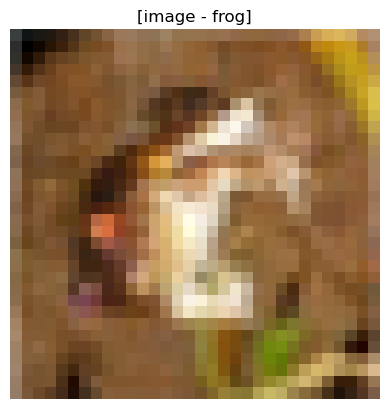

In [101]:
show_data_image(data_dict, 0)

image shape: torch.Size([32, 32, 3])
image label: 3.0
translate image label: cat
(32, 32, 3)


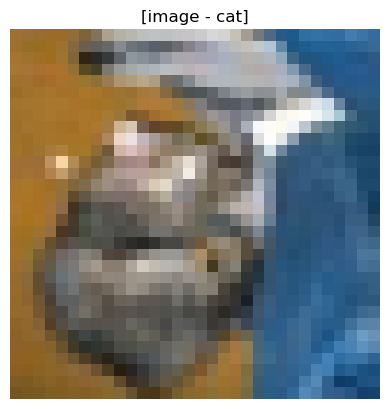

In [106]:
show_data_image(test_dict, 0)

In [107]:
test_data_dl = DataLoader(test_dict)

In [116]:
test_data_dl.dataset['images'][0]

tensor([[[0.6196, 0.6235, 0.6471,  ..., 0.5373, 0.4941, 0.4549],
         [0.5961, 0.5922, 0.6235,  ..., 0.5333, 0.4902, 0.4667],
         [0.5922, 0.5922, 0.6196,  ..., 0.5451, 0.5098, 0.4706],
         ...,
         [0.2667, 0.1647, 0.1216,  ..., 0.1490, 0.0510, 0.1569],
         [0.2392, 0.1922, 0.1373,  ..., 0.1020, 0.1137, 0.0784],
         [0.2118, 0.2196, 0.1765,  ..., 0.0941, 0.1333, 0.0824]],

        [[0.4392, 0.4353, 0.4549,  ..., 0.3725, 0.3569, 0.3333],
         [0.4392, 0.4314, 0.4471,  ..., 0.3725, 0.3569, 0.3451],
         [0.4314, 0.4275, 0.4353,  ..., 0.3843, 0.3725, 0.3490],
         ...,
         [0.4863, 0.3922, 0.3451,  ..., 0.3804, 0.2510, 0.3333],
         [0.4549, 0.4000, 0.3333,  ..., 0.3216, 0.3216, 0.2510],
         [0.4196, 0.4118, 0.3490,  ..., 0.3020, 0.3294, 0.2627]],

        [[0.1922, 0.1843, 0.2000,  ..., 0.1412, 0.1412, 0.1294],
         [0.2000, 0.1569, 0.1765,  ..., 0.1216, 0.1255, 0.1333],
         [0.1843, 0.1294, 0.1412,  ..., 0.1333, 0.1333, 0.

In [113]:
train_data_dl = DataLoader(data_dict)

In [115]:
train_data_dl.dataset['images'][0]

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

- 일단 그림을 그릴 수 있는 데이터 셋?은 만든거 같음..
- 다듬는건 새벽의 제가 할거라 믿습니다.